# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


# Data Collection & Analysis

In [4]:
# import data
df = pd.read_csv('H:/ML/Medical Insurance Cost Prediction/insurance.csv')


In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# No of rows and columns

In [7]:
df.shape

(1338, 7)

# info about dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Find missing value

In [10]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Data Analysis

In [11]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Age distribution

C:\Users\osama\AppData\Local\Temp\ipykernel_17008\201379171.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


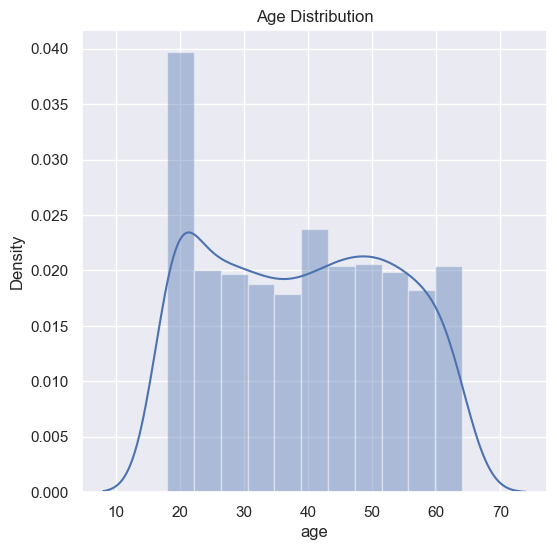

In [12]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show()

# Gender column

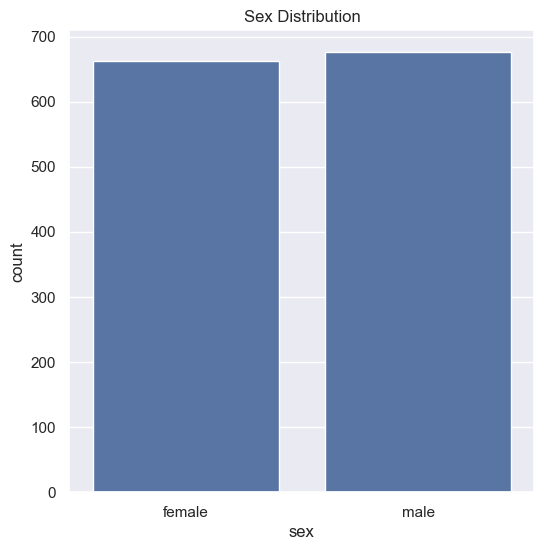

In [13]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=df)
plt.title('Sex Distribution')
plt.show()

In [14]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

# bmi distribution

C:\Users\osama\AppData\Local\Temp\ipykernel_17008\612186198.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'])


<function matplotlib.pyplot.show(close=None, block=None)>

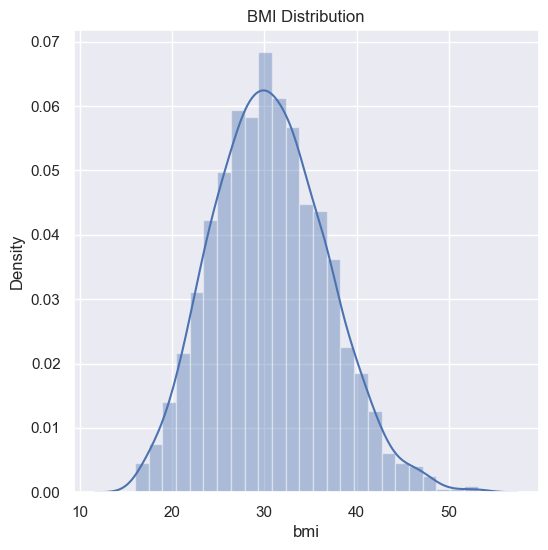

In [15]:
plt.figure(figsize=(6,6))
sns.distplot(df['bmi'])
plt.title('BMI Distribution')
plt.show

# children column

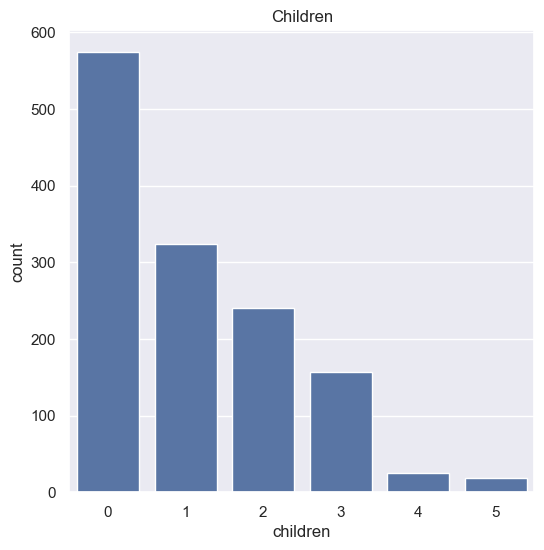

In [16]:
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=df)
plt.title('Children')
plt.show()

In [17]:
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

# smoker column

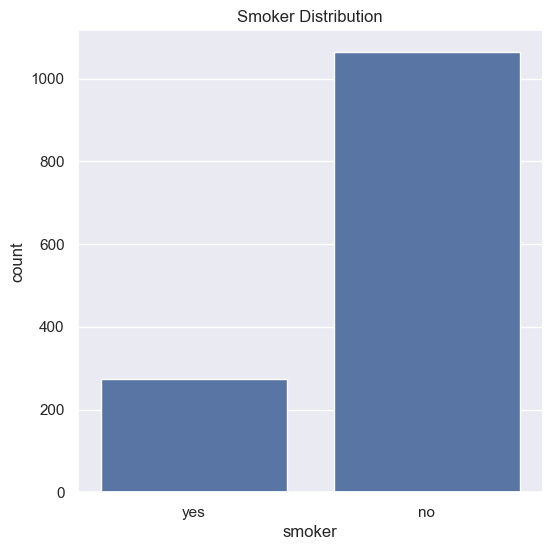

In [18]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=df)
plt.title('Smoker Distribution')
plt.show()

In [19]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

# region column

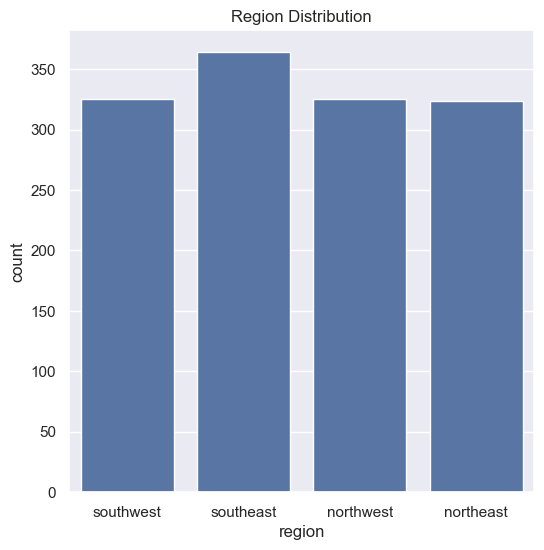

In [20]:
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=df)
plt.title('Region Distribution')
plt.show()

In [21]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

# distribution of charges value

<Figure size 600x600 with 0 Axes>

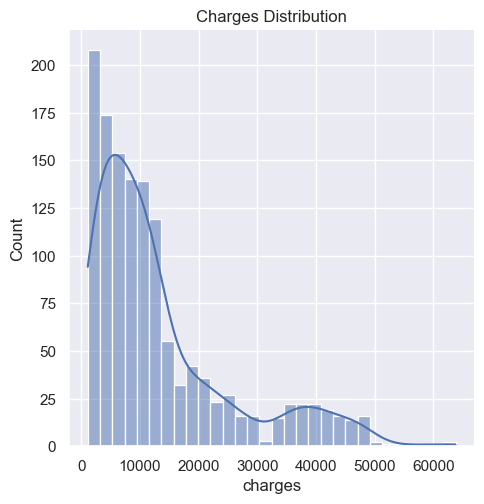

In [26]:
plt.figure(figsize=(6,6))
sns.displot(df['charges'], kde=True)
plt.title('Charges Distribution')
plt.show()

# Data Pre-Processing
Encoding the categorical features

In [28]:
# encoding sex column
df.replace({'sex': {'male': 0, 'female': 1}}, inplace=True)
# encoding smoker column
df.replace({'smoker': {'yes': 1, 'no': 0}}, inplace=True)
# encoding region column
df.replace({'region': {'southeast': 0, 'southwest': 1, 'northeast': 2, 'northwest': 3}}, inplace=True)

C:\Users\osama\AppData\Local\Temp\ipykernel_17008\2572935069.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'sex': {'male': 0, 'female': 1}}, inplace=True)
C:\Users\osama\AppData\Local\Temp\ipykernel_17008\2572935069.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'smoker': {'yes': 1, 'no': 0}}, inplace=True)
C:\Users\osama\AppData\Local\Temp\ipykernel_17008\2572935069.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old beh

In [29]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


Splitting the Features and Target

In [30]:
X = df.drop(columns='charges', axis=1)
Y = df['charges']

In [31]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       1       1
1      18    0  33.770         1       0       0
2      28    0  33.000         3       0       0
3      33    0  22.705         0       0       3
4      32    0  28.880         0       0       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       0       3
1334   18    1  31.920         0       0       2
1335   18    1  36.850         0       0       0
1336   21    1  25.800         0       0       1
1337   61    1  29.070         0       1       3

[1338 rows x 6 columns]


In [32]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Training data & Testing Data

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X_train.shape, X_test.shape)

(1070, 6) (268, 6)


# Model Training

Linear Regression

In [42]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

Model Evaluation

In [43]:
# Prediction on test data
test_data_prediction = regressor.predict(X_test)
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error: ", error_score)


R squared error:  0.7447273869684077


In [44]:
# predictions on training data
train_data_prediction = regressor.predict(X_train) 
# R squared error
train_error_score = metrics.r2_score(Y_train, train_data_prediction)
print("R squared error on training data: ", train_error_score)

R squared error on training data:  0.751505643411174


Building a Predictive System

In [52]:
input_data = (31,1,25.74,0,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])


[27688.18228711]
The insurance cost is USD  27688.182287107244


c:\Users\osama\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
